In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("poster")
sns.set_context("talk", 1.0, {"lines.linewidth": 3})

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from pylab import rcParams

![ビーコン20個想定](RSSI取得実験図/gym4.JPG)

今回は、データを2つ取り、合成することで仮想的に1つのデータとして扱う。

In [28]:
#データを取得
#パターン1
df_s1 = pd.read_csv("./取得データセット/受信機1/nkmr1-dataset_gym4.csv")
df_s2 = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset_gym4.csv")
df_s3 = pd.read_csv("./取得データセット/受信機3/nkmr3-dataset_gym4.csv")
df_s4 = pd.read_csv("./取得データセット/受信機4/nkmr4-dataset_gym4.csv")

#パターン2
df_s5 = pd.read_csv("./取得データセット/受信機1/nkmr1-dataset_gym5.csv")
df_s6 = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset_gym5.csv")
df_s7 = pd.read_csv("./取得データセット/受信機3/nkmr3-dataset_gym5.csv")
df_s8 = pd.read_csv("./取得データセット/受信機4/nkmr4-dataset_gym5.csv")

#それぞれのカラムを設定
df_s1.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df_s2.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df_s3.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df_s4.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df_s5.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df_s6.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df_s7.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df_s8.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]

df_s5.x,df_s5.y = 100,100
df_s6.x,df_s6.y = 100,100
df_s7.x,df_s7.y = 100,100
df_s8.x,df_s8.y = 100,100


df_ss1_n = df_s1.append(df_s2).append(df_s3) #受信機4のデータを抜く
df_ss2_n = df_s5.append(df_s6).append(df_s7) #受信機8のデータを抜く


#x == 20,y == 20のところは取得する必要のないものなので、削除
df_ss1 = df_ss1_n.where(((df_ss1_n.x != 20) & (df_ss1_n.y != 20))).dropna()
df_ss2 = df_ss2_n.dropna()

"""

#受信機によって取得できていないビーコンがあるので、共通して取得できているもののみを抽出する
df_ss1 = pd.DataFrame()
df_ss2 = pd.DataFrame()
for a in df_ss1_n[df_ss1_n.device_name == "rasp1"].UUIDs.unique():
    for b in df_ss1_n[df_ss1_n.device_name == "nkmr-2"].UUIDs.unique():
        for c in df_ss1_n[df_ss1_n.device_name == "nkmr-4"].UUIDs.unique():
            if a == b:
                if a == c:
                    df_ss1 = df_ss1.append(df_ss1_n[df_ss1_n.UUIDs == a])
                    
for a in df_s7.UUIDs.unique():
    for b in df_s8.UUIDs.unique():
        for c in df_s6.UUIDs.unique():
            if a == b:
                if a == c:
                    df_ss2 = df_ss2.append(df_ss2_n[df_ss2_n.UUIDs == a])
"""


#同期ビーコンのid
set_uuid = "1000000007ae1001b000001c4d8dffff"

#送信機のid
id1 = "10000000aaaa41441111110000000000"
id2 = "20000000aaaa41441111110000000000"
id3 = "30000000aaaa41441111110000000000"
id4 = "40000000aaaa41441111110000000000"
id5 = "50000000aaaa41441111110000000000"
id6 = "60000000aaaa41441111110000000000"
id7 = "70000000aaaa41441111110000000000"
id8 = "80000000aaaa41441111110000000000" 
id9 = "90000000aaaa41441111110000000000"
id10 = "a0000000aaaa41441111110000000000"
id_list = [id1,id2,id3,id4,id5,id6,id7,id8,id9,id10]

#locateを作成
df_ss1["locate"] = 0
for i,w in enumerate(id_list):
    df_ss1.locate = df_ss1.locate.where(df_ss1.UUIDs != w,i+1)
df_ss1.locate = df_ss1.locate.astype(int)

df_ss2["locate"] = 0
for i,w in enumerate(id_list):
    df_ss2.locate = df_ss2.locate.where(df_ss2.UUIDs != w,i+11)
df_ss2.locate = df_ss2.locate.astype(int)

#deviceを作成
df_ss1["device"] = 0
df_ss1.device = df_ss1.device.where(df_ss1.device_name != "rasp1",1)
df_ss1.device = df_ss1.device.where(df_ss1.device_name != "nkmr-2",2)
df_ss1.device = df_ss1.device.where(df_ss1.device_name != "rasp3",3)
df_ss1.device = df_ss1.device.where(df_ss1.device_name != "nkmr-4",4)

df_ss2["device"] = 0
df_ss2.device = df_ss2.device.where(df_ss2.device_name != "rasp1",1)
df_ss2.device = df_ss2.device.where(df_ss2.device_name != "nkmr-2",2)
df_ss2.device = df_ss2.device.where(df_ss2.device_name != "rasp3",3)
df_ss2.device = df_ss2.device.where(df_ss2.device_name != "nkmr-4",4)

#発信機ごとに分ける(リスト1)
df_1_1 = df_ss1[(df_ss1.UUIDs == id1) | (df_ss1.UUIDs == set_uuid)]
df_2_1 = df_ss1[(df_ss1.UUIDs == id2) | (df_ss1.UUIDs == set_uuid)]
df_3_1 = df_ss1[(df_ss1.UUIDs == id3) | (df_ss1.UUIDs == set_uuid)]
df_4_1 = df_ss1[(df_ss1.UUIDs == id4) | (df_ss1.UUIDs == set_uuid)]
df_5_1 = df_ss1[(df_ss1.UUIDs == id5) | (df_ss1.UUIDs == set_uuid)]
df_6_1 = df_ss1[(df_ss1.UUIDs == id6) | (df_ss1.UUIDs == set_uuid)]
df_7_1 = df_ss1[(df_ss1.UUIDs == id7) | (df_ss1.UUIDs == set_uuid)]
df_8_1 = df_ss1[(df_ss1.UUIDs == id8) | (df_ss1.UUIDs == set_uuid)]
df_9_1 = df_ss1[(df_ss1.UUIDs == id9) | (df_ss1.UUIDs == set_uuid)]
df_10_1 = df_ss1[(df_ss1.UUIDs == id10) | (df_ss1.UUIDs == set_uuid)]

df_list1 = [df_1_1,
            df_2_1,
            df_3_1,
            df_4_1,
            df_5_1,
            df_6_1,
            df_7_1,
            df_8_1,
            df_9_1,
            df_10_1
           ]

#発信機ごとに分ける(リスト2)
df_1_2 = df_ss2[(df_ss2.UUIDs == id1) | (df_ss2.UUIDs == set_uuid)]
df_2_2 = df_ss2[(df_ss2.UUIDs == id2) | (df_ss2.UUIDs == set_uuid)]
df_3_2 = df_ss2[(df_ss2.UUIDs == id3) | (df_ss2.UUIDs == set_uuid)]
df_4_2 = df_ss2[(df_ss2.UUIDs == id4) | (df_ss2.UUIDs == set_uuid)]
df_5_2 = df_ss2[(df_ss2.UUIDs == id5) | (df_ss2.UUIDs == set_uuid)]
df_6_2 = df_ss2[(df_ss2.UUIDs == id6) | (df_ss2.UUIDs == set_uuid)]
df_7_2 = df_ss2[(df_ss2.UUIDs == id7) | (df_ss2.UUIDs == set_uuid)]
df_8_2 = df_ss2[(df_ss2.UUIDs == id8) | (df_ss2.UUIDs == set_uuid)]
df_9_2 = df_ss2[(df_ss2.UUIDs == id9) | (df_ss2.UUIDs == set_uuid)]
df_10_2 = df_ss2[(df_ss2.UUIDs == id10) | (df_ss2.UUIDs == set_uuid)]

df_list2 = [df_1_2,
            df_2_2,
            df_3_2,
            df_4_2,
            df_5_2,
            df_6_2,
            df_7_2,
            df_8_2,
            df_9_2,
            df_10_2
           ]

In [29]:
df_ss1_s = df_s1.append(df_s2).append(df_s3).append(df_s4) 
df_ss2_s = df_s5.append(df_s6).append(df_s7).append(df_s8) 
df_ss1_s = df_ss1_s.where(((df_ss1_s.x != 20) & (df_ss1_s.y != 20))).dropna()


x = np.array([i for i in range(1,11)])
y = []
for i in id_list:
    if i != 0:
        y.append(df_ss1_s[(df_ss1_s.device_name=="nkmr-4")&(df_ss1_s.UUIDs == i)].RSSI.mean())                          

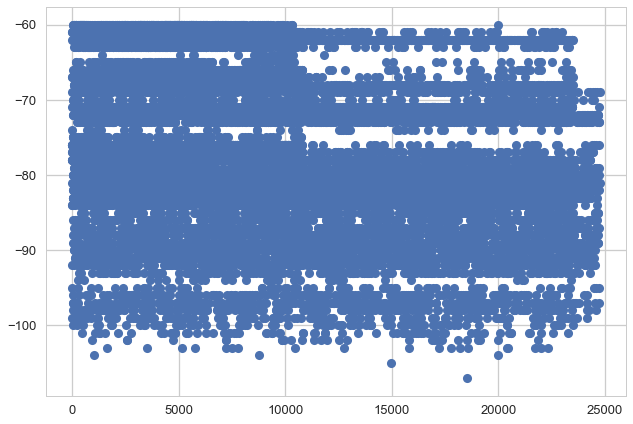

In [6]:
plt.plot(df_list1[5].RSSI,"o")

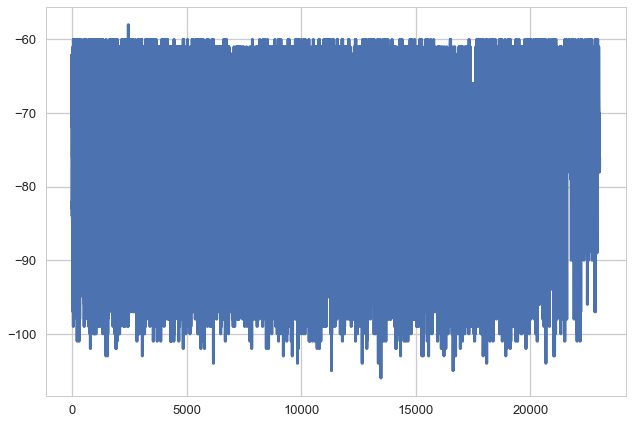

In [8]:
plt.plot(df_list2[5].RSSI)

<Container object of 10 artists>

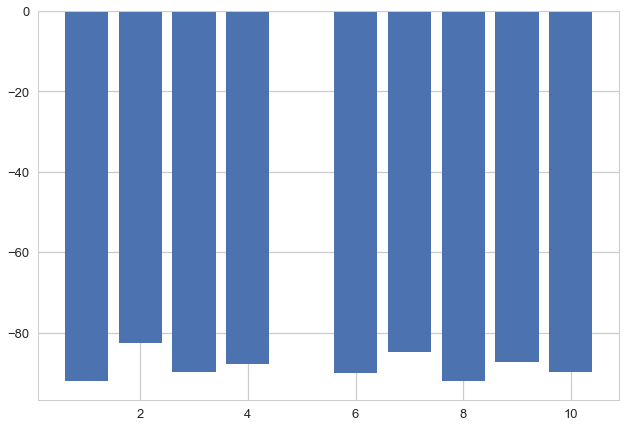

In [9]:
plt.bar(x,y)

### 前処理用のモジュール読み込み

In [30]:
import preprocessing as pre

### 直接波と反射波の識別

In [31]:
#直接波と反射波の識別(リスト1)
df_list1 = pre.make_cluster(df_list1,["RSSI","locate"])
#直接波と反射波の識別(リスト2)
df_list2 = pre.make_cluster(df_list2,["RSSI","locate"])

In [18]:
df_list2[0]

,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp,x,y,locate,device,cluster
0,1000000007ae1001b000001c4d8dffff,8192,6,0.261971,immediate,-128,-82,nkmr-4,2018/03/20 10:55:43,100,100,0,4,1
1,1000000007ae1001b000001c4d8dffff,8192,7,0.269712,immediate,-128,-83,nkmr-4,2018/03/20 10:55:43,100,100,0,4,1
2,1000000007ae1001b000001c4d8dffff,8192,7,0.146326,immediate,-128,-62,nkmr-4,2018/03/20 10:55:43,100,100,0,4,0
3,1000000007ae1001b000001c4d8dffff,8192,7,0.195789,immediate,-128,-72,nkmr-4,2018/03/20 10:55:43,100,100,0,4,0
4,1000000007ae1001b000001c4d8dffff,8192,7,0.174261,immediate,-128,-68,nkmr-4,2018/03/20 10:55:44,100,100,0,4,0
5,1000000007ae1001b000001c4d8dffff,8192,7,0.146326,immediate,-128,-62,nkmr-4,2018/03/20 10:55:44,100,100,0,4,0
6,1000000007ae1001b000001c4d8dffff,8192,7,0.269712,immediate,-128,-83,nkmr-4,2018/03/20 10:55:44,100,100,0,4,1
7,1000000007ae1001b000001c4d8dffff,8192,7,0.261971,immediate,-128,-82,nkmr-4,2018/03/20 10:55:44,100,100,0,4,1
8,1000000007ae1001b000001c4d8dffff,8192,7,0.195789,immediate,-128,-72,nkmr-4,2018/03/20 10:55:44,100,100,0,4,0
9,1000000007ae1001b000001c4d8dffff,8192,7,0.233167,immediate,-128,-78,nkmr-4,2018/03/20 10:55:44,100,100,0,4,1


### 時刻合わせ

In [32]:
#時刻合わせ(リスト1)
for (i,df) in enumerate(df_list1):
    df_list1[i] = pre.set_time(df,set_uuid)

#時刻合わせ(リスト2)
for (i,df) in enumerate(df_list2):
    df_list2[i] = pre.set_time(df,set_uuid)

### 空のdataframeの削除

In [33]:
df_list1 = list(filter(lambda x:list(x.device_name.unique()) == ['nkmr-4', 'rasp1', 'rasp3'], df_list1))
df_list2 = list(filter(lambda x:list(x.device_name.unique()) == ['nkmr-4', 'rasp1', 'rasp3'], df_list2))

In [35]:
df_list1[0]

,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp,x,y,locate,device,cluster,time
1,20000000aaaa41441111110000000000,2.0,40.0,1.048947,near,-78.0,-79.0,nkmr-4,2018/03/20 10:16:34,200.0,200.0,2,4,1,5
3,20000000aaaa41441111110000000000,2.0,40.0,0.908852,near,-78.0,-76.0,nkmr-4,2018/03/20 10:16:34,200.0,200.0,2,4,1,5
4,20000000aaaa41441111110000000000,2.0,40.0,1.100289,near,-78.0,-80.0,nkmr-4,2018/03/20 10:16:34,200.0,200.0,2,4,1,5
7,20000000aaaa41441111110000000000,2.0,40.0,1.048947,near,-78.0,-79.0,nkmr-4,2018/03/20 10:16:35,200.0,200.0,2,4,1,6
10,20000000aaaa41441111110000000000,2.0,40.0,1.612630,near,-78.0,-88.0,nkmr-4,2018/03/20 10:16:35,200.0,200.0,2,4,1,6
11,20000000aaaa41441111110000000000,2.0,40.0,1.000000,near,-78.0,-78.0,nkmr-4,2018/03/20 10:16:35,200.0,200.0,2,4,1,6
13,20000000aaaa41441111110000000000,2.0,40.0,1.100289,near,-78.0,-80.0,nkmr-4,2018/03/20 10:16:35,200.0,200.0,2,4,1,6
15,20000000aaaa41441111110000000000,2.0,40.0,1.000000,near,-78.0,-78.0,nkmr-4,2018/03/20 10:16:35,200.0,200.0,2,4,1,6
16,20000000aaaa41441111110000000000,2.0,40.0,2.047870,near,-78.0,-93.0,nkmr-4,2018/03/20 10:16:35,200.0,200.0,2,4,1,6
18,20000000aaaa41441111110000000000,2.0,40.0,0.953337,near,-78.0,-77.0,nkmr-4,2018/03/20 10:16:35,200.0,200.0,2,4,1,6


### 時刻毎にRSSIの平均値をとる

In [21]:
#時刻毎のRSSIの平均値を格納(リスト1)
train_df1 = pd.DataFrame()
column_name = ["dev1","dev2","dev3","time","locate","x","y","cluster"]
#column_name = ["dev1","dev2","dev3","dev4","time","locate","x","y","cluster"]
time_max = pre.max_value(df_list1)

#空のものを外す
#for i in range(len(df_list1)):
#    if len(df_list1[i]) != 0:
        
#    if len(df_list1[i]) == 0:
#        df_list1.pop(i)

for df in df_list1:
    locate = df["locate"].iloc[1]
    x = df["x"].iloc[1]
    y = df["y"].iloc[1]
    mid_df = pre.get_mean(df,column_name,locate,x,y,time_max)
    train_df1 = pd.concat([train_df1,mid_df])

In [ ]:
train_df1.locate.unique()

In [ ]:
plt.plot(train_df1[train_df1.locate == 7].dev1)

In [22]:
#時刻毎のRSSIの平均値を格納(リスト1)
train_df2 = pd.DataFrame()
column_name = ["dev1","dev2","dev3","time","locate","x","y","cluster"]
#column_name = ["dev1","dev2","dev3","dev4","time","locate","x","y","cluster"]
time_max = pre.max_value(df_list2)

#空のものを外す
#for i in range(len(df_list1)):
#    if len(df_list1[i]) != 0:
        
#    if len(df_list1[i]) == 0:
#        df_list1.pop(i)

for df in df_list2:
    locate = df["locate"].iloc[1]
    x = df["x"].iloc[1]
    y = df["y"].iloc[1]
    mid_df = pre.get_mean(df,column_name,locate,x,y,time_max)
    train_df2 = pd.concat([train_df2,mid_df])

In [ ]:
len(train_df2)

受信機によって欠損する値が発生しているため、エラー。

In [24]:
#NANのある行を削除し、time,locate,x,y,clusterをintに変換
direct = train_df1[train_df1.cluster == 0].dropna(thresh=4).interpolate().dropna()
reflect = train_df1[train_df1.cluster == 1].dropna(thresh=4).interpolate().dropna()
train1 = pd.concat([direct,reflect])
train1.locate = train1.locate.astype("int")
train1.time = train1.time.astype("int")
train1.x = train1.x.astype("int")
train1.y = train1.y.astype("int")
train1.cluster = train1.cluster.astype("int")

In [ ]:
len(train1)

In [25]:
train1[train1.locate == 10].cluster.unique()

array([1])

In [ ]:
#NANのある行を削除し、time,locate,x,y,clusterをintに変換
direct = train_df2[train_df2.cluster == 0].dropna(thresh=4).interpolate().dropna()
reflect = train_df2[train_df2.cluster == 1].dropna(thresh=4).interpolate().dropna()
train2 = pd.concat([direct,reflect])
train2.locate = train2.locate.astype("int")
train2.time = train2.time.astype("int")
train2.x = train2.x.astype("int")
train2.y = train2.y.astype("int")
train2.cluster = train2.cluster.astype("int")

In [ ]:
train2[train2.locate == 16]

In [ ]:
len(train2[train2.locate == 19])

In [ ]:
train = pd.concat([train1,train2])

### 近い地点を設定

In [ ]:
train["near_locate"] = 0
train["near_locate"] = train.near_locate.where(((train.locate != 2) & (train.locate != 4) & (train.locate != 7) & (train.locate != 9) & (train.locate != 10)),1)
train["near_locate"] = train.near_locate.where(((train.locate != 6) & (train.locate != 8)),2)
train["near_locate"] = train.near_locate.where(((train.locate != 12) & (train.locate != 17) & (train.locate != 19)),3)
train["near_locate"] = train.near_locate.where(((train.locate != 15) & (train.locate != 16) & (train.locate != 18)),4)

### 学習用データセット

In [ ]:
#学習用とテスト用に分ける
train_s = train[(train.locate != 6) & (train.locate != 7) & (train.locate != 16) & (train.locate != 17) & (train.locate != 10)] 
test_s =  train[(train.locate == 6) | (train.locate == 7) | (train.locate == 16) | (train.locate == 17)]

### データセット(ラベルがlocate)

In [ ]:
from sklearn.utils import shuffle

# 学習用データセットを用意
#train_x = np.array(train_s[["dev1","dev2","dev3","dev4","cluster"]])
train_x = np.array(train_s[["dev1","dev2","dev3","cluster"]])
train_y = np.array(train_s[["near_locate"]])
train_x,train_y = shuffle(train_x,train_y)
#test_x = np.array(test_s[["dev1","dev2","dev3","dev4","cluster"]])
test_x = np.array(test_s[["dev1","dev2","dev3","cluster"]])
test_y = np.array(test_s[["near_locate"]])
test_y_2 = np.array(test_s[["locate"]])
test_x,test_y,test_y_2 = shuffle(test_x,test_y,test_y_2)

### xgboost

In [441]:
import xgboost as xgb

model = xgb.XGBClassifier(max_depth=4,n_estimators=500)
clf = model.fit(train_x,train_y)
#clf = model.fit(train_x,train_y)
pred = clf.predict(test_x)


hoge_c = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y),pd.DataFrame(test_y_2)],axis=1)
#hoge_c.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge_c.columns = ["pred","answer","real_answer"]

score = len(hoge_c[hoge_c.pred == hoge_c.answer])/len(hoge_c)
print("総合精度:%s" % score)
hoge_c

総合精度:0.2551187551187551


,pred,answer,real_answer
0,1,4,16
1,1,1,7
2,1,2,6
3,1,1,7
4,1,1,7
5,1,1,7
6,1,3,17
7,1,3,17
8,1,2,6
9,1,4,16


In [442]:
print("モデルが予測した地点の数")
print("1 : {}".format(hoge_c.pred[hoge_c.pred == 1].count()))
print("2 : {}".format(hoge_c.pred[hoge_c.pred == 2].count()))
print("3 : {}".format(hoge_c.pred[hoge_c.pred == 3].count()))
print("4 : {}".format(hoge_c.pred[hoge_c.pred == 4].count()))

モデルが予測した地点の数
1 : 2075
2 : 356
3 : 0
4 : 11


In [ ]:
print("地点毎の精度")
print("1 : {}".format(

### キャリブレーション用のデータ定義

In [443]:
# キャリブレーションデータを取得
cali_df = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset_cali.csv")
# カラム付け
cali_df.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","CalRSSI","empty"]

#locateを作成
cali_df["locate"] = 0
for i,w in enumerate(id_list,1):
    cali_df.locate = cali_df.locate.where(cali_df.UUIDs != w,i)

cali_list = [cali_df[cali_df.UUIDs==uuid] for uuid in id_list]

#直接波と反射波の識別
cali_list = pre.make_cluster(cali_list,["RSSI","locate"])

cali_list2 = [cali_list[1][cali_list[1].cluster == 0].RSSI.mean()/\
              cali_list[i][cali_list[i].cluster == 0].RSSI.mean() for i in range(len(cali_list))]

for i in range(len(cali_list2)):
    cali_list2[i] = round(cali_list2[i],2)
cali_list2

train_cali = train.copy()

for i in range(1,len(cali_list2)):
    train_cali[["dev1","dev2","dev3"]] =\
    train_cali[["dev1","dev2","dev3"]].where(train_cali.locate != i,train[["dev1","dev2","dev3"]]*cali_list2[i])
    train_cali[["dev1","dev2","dev3"]] =\
    train_cali[["dev1","dev2","dev3"]].where(train_cali.locate != i+10,train[["dev1","dev2","dev3"]]*cali_list2[i])
    
#学習用とテスト用に分ける
train_s =\
train_cali[(train_cali.locate != 6) & (train_cali.locate != 7) & (train_cali.locate != 16) & (train_cali.locate != 17) & (train_cali.locate != 10)] 
test_s =\
train_cali[(train_cali.locate == 6) | (train_cali.locate == 7) | (train_cali.locate == 16) | (train_cali.locate == 17)]

# 学習用データセットを用意
#train_x = np.array(train_s[["dev1","dev2","dev3","dev4","cluster"]])
train_x = np.array(train_s[["dev1","dev2","dev3","cluster"]])
train_y = np.array(train_s[["near_locate"]])
train_x,train_y = shuffle(train_x,train_y)
#test_x = np.array(test_s[["dev1","dev2","dev3","dev4","cluster"]])
test_x = np.array(test_s[["dev1","dev2","dev3","cluster"]])
test_y = np.array(test_s[["near_locate"]])
test_y_2 = np.array(test_s[["locate"]])
test_x,test_y,test_y_2 = shuffle(test_x,test_y,test_y_2)

In [1]:
train.dev1[train.locate == 17]

NameError: name 'train' is not defined

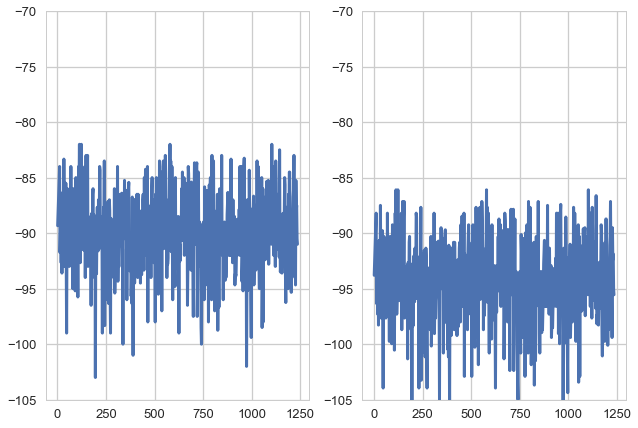

In [456]:
#キャリブレーション前
plt.subplot(1,2,1)
plt.plot(train.dev1[train.locate == 6])
plt.ylim(-105,-70)

#キャリブレーション後
plt.subplot(1,2,2)
plt.ylim(-105,-70)
plt.plot(train_cali.dev1[train_cali.locate == 6])

(-105, -70)

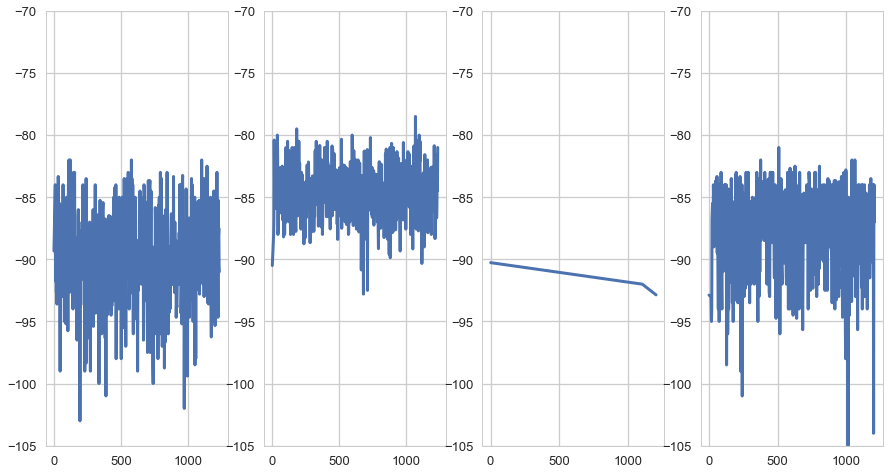

In [495]:
rcParams['figure.figsize'] = 15,8

plt.subplot(1,4,1)
plt.plot(train.dev1[train.locate == 6])
plt.ylim(-105,-70)

plt.subplot(1,4,2)
plt.plot(train.dev1[train.locate == 7])
plt.ylim(-105,-70)

plt.subplot(1,4,3)
plt.plot(train.dev1[train.locate == 16])
plt.ylim(-105,-70)

plt.subplot(1,4,4)
plt.plot(train.dev1[train.locate == 17])
plt.ylim(-105,-70)

### xgboost(キャリブレーションあり)

In [403]:
model = xgb.XGBClassifier(max_depth=4,n_estimators=500)
clf = model.fit(train_x,train_y)
#clf = model.fit(train_x,train_y)
pred = clf.predict(test_x)


hoge_c = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y),pd.DataFrame(test_y_2)],axis=1)
#hoge_c.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge_c.columns = ["pred","answer","real_answer"]

score = (len(hoge_c[hoge_c.pred == hoge_c.answer]))/len(hoge_c)
print("総合精度:%s" % score)
hoge_c

総合精度:0.22727272727272727


,pred,answer,real_answer
0,2,1,7
1,2,1,7
2,1,2,6
3,1,2,6
4,3,3,17
5,2,1,7
6,1,4,16
7,1,4,16
8,1,2,6
9,1,2,6


In [404]:
print("モデルが予測した地点の数")
print("1 : {}".format(hoge_c.pred[hoge_c.pred == 1].count()))
print("2 : {}".format(hoge_c.pred[hoge_c.pred == 2].count()))
print("3 : {}".format(hoge_c.pred[hoge_c.pred == 3].count()))
print("4 : {}".format(hoge_c.pred[hoge_c.pred == 4].count()))

モデルが予測した地点の数
1 : 1880
2 : 235
3 : 323
4 : 4


### 主成分分析

In [405]:
from sklearn.decomposition import PCA

In [406]:
#学習用とテスト用に分ける
train_s = train[(train.locate != 6) & (train.locate != 7) & (train.locate != 16) & (train.locate != 17) & (train.locate != 10)] 
test_s =  train[(train.locate == 6) | (train.locate == 7) | (train.locate == 16) | (train.locate == 17)]

In [407]:
train_x = np.array(train_s[["dev1","dev2","dev3"]])
train_x_2 = np.array(train_s[["cluster"]])
train_y = np.array(train_s[["near_locate"]])
train_x,train_x_2,train_y = shuffle(train_x,train_x_2,train_y)

test_x = np.array(test_s[["dev1","dev2","dev3"]])
test_x_2 = np.array(test_s[["cluster"]])
test_y = np.array(test_s[["near_locate"]])
test_y_2 = np.array(test_s[["locate"]])
test_x,test_x_2,test_y,test_y_2 = shuffle(test_x,test_x_2,test_y,test_y_2)

#トレーニングデータの主成分分析
pca = PCA(n_components=3)
#pca.fit(train_x)

transformed = pca.fit_transform(train_x)
transformed = np.concatenate((transformed,train_x_2), axis = 1) 

#テストデータの主成分分析
pca = PCA(n_components=3)
#pca.fit(test_x)

test_x = pca.fit_transform(test_x)
test_x = np.concatenate((test_x,test_x_2), axis = 1) 

### xgboost(主成分分析あり)

In [408]:
model = xgb.XGBClassifier(max_depth=4,n_estimators=500)
clf = model.fit(transformed,train_y)
#clf = model.fit(train_x,train_y)
pred = clf.predict(test_x)


hoge_c = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y),pd.DataFrame(test_y_2)],axis=1)
#hoge_c.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge_c.columns = ["pred","answer","real_answer"]

score = (len(hoge_c[hoge_c.pred == hoge_c.answer]))/len(hoge_c)
print("総合精度:%s" % score)
hoge_c

総合精度:0.23791973791973792


,pred,answer,real_answer
0,1,1,7
1,1,3,17
2,3,3,17
3,1,1,7
4,4,3,17
5,1,3,17
6,1,4,16
7,1,4,16
8,4,3,17
9,2,1,7


In [409]:
print("モデルが予測した地点の数")
print("1 : {}".format(hoge_c.pred[hoge_c.pred == 1].count()))
print("2 : {}".format(hoge_c.pred[hoge_c.pred == 2].count()))
print("3 : {}".format(hoge_c.pred[hoge_c.pred == 3].count()))
print("4 : {}".format(hoge_c.pred[hoge_c.pred == 4].count()))

モデルが予測した地点の数
1 : 941
2 : 822
3 : 197
4 : 482
